In [220]:
#Import various libraries required
import requests
import json
import streamlit as st
import pandas as pd
import numpy as np
from st_card_component_2 import card_component
from PIL import Image
import matplotlib.pyplot as plt
import calendar
import seaborn as sns

In [221]:
# Pulling the data from the API and using json library to read and convert the data into a usable format

response = requests.get("https://webhooks.mongodb-stitch.com/api/client/v2.0/app/covid-19-qppza/service/REST-API/incoming_webhook/global?country=Kenya&hide_fields=_id, country, country_code, country_iso2, country_iso3, loc, state, uid'").text
response_info = json.loads(response)

In [222]:
#Create a list with Covid Cases data we need by looping through the imported data

covid_cases = []
for country_info in response_info:
    covid_cases.append(
        [country_info["confirmed"], country_info["deaths"], country_info["recovered"], country_info["confirmed_daily"],
         country_info["deaths_daily"], country_info["recovered_daily"], country_info["date"]])

In [223]:
#Convert list data to Dataframe for further data analysis

covid_df = pd.DataFrame(data=covid_cases, columns=["confirmed", "deaths", "recovered", "confirmed_daily", "deaths_daily", "recovered_daily", "date"])

covid_df.tail(5)

,confirmed,deaths,recovered,confirmed_daily,deaths_daily,recovered_daily,date
844,324026,5649,0,15,0,0,2022-05-15T00:00:00.000Z
845,324046,5649,0,20,0,0,2022-05-16T00:00:00.000Z
846,324071,5649,0,25,0,0,2022-05-17T00:00:00.000Z
847,324097,5649,0,26,0,0,2022-05-18T00:00:00.000Z
848,324129,5649,0,32,0,0,2022-05-19T00:00:00.000Z


In [224]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 849 entries, 0 to 848
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   confirmed        849 non-null    int64 
 1   deaths           849 non-null    int64 
 2   recovered        849 non-null    int64 
 3   confirmed_daily  849 non-null    int64 
 4   deaths_daily     849 non-null    int64 
 5   recovered_daily  849 non-null    int64 
 6   date             849 non-null    object
dtypes: int64(6), object(1)
memory usage: 46.6+ KB


In [225]:
# Missing values for every column
covid_df.isna().sum()

confirmed          0
deaths             0
recovered          0
confirmed_daily    0
deaths_daily       0
recovered_daily    0
date               0
dtype: int64

In [226]:
covid_df.head(5)

,confirmed,deaths,recovered,confirmed_daily,deaths_daily,recovered_daily,date
0,0,0,0,0,0,0,2020-01-22T00:00:00.000Z
1,0,0,0,0,0,0,2020-01-23T00:00:00.000Z
2,0,0,0,0,0,0,2020-01-24T00:00:00.000Z
3,0,0,0,0,0,0,2020-01-25T00:00:00.000Z
4,0,0,0,0,0,0,2020-01-26T00:00:00.000Z


In [227]:
df_last_entry = covid_df.iloc[-1:]
df_last_entry

,confirmed,deaths,recovered,confirmed_daily,deaths_daily,recovered_daily,date
848,324129,5649,0,32,0,0,2022-05-19T00:00:00.000Z


- Noticed the last present total recovered data is 0. This is odd need to investigate further.

In [228]:
# Get the largest value of recovered cases
df_recovered = covid_df["recovered"].max()
df_recovered

191188

- Noticed that the largest recovered number is way lower than the total confirmed cases and doesn't match the death cases

In [229]:
# Get Index of the max value of recovered
recovered_date = covid_df["recovered"].idxmax()
recovered_date

560

In [230]:
# Print afew values above and below the 560 index for further evaluation
df_investigating = covid_df.loc[[557,558,559,560,561,562,563]]
df_investigating

,confirmed,deaths,recovered,confirmed_daily,deaths_daily,recovered_daily,date
557,203680,3946,189131,467,15,195,2021-08-01T00:00:00.000Z
558,204271,3970,189692,591,24,561,2021-08-02T00:00:00.000Z
559,205356,3995,190095,1085,25,403,2021-08-03T00:00:00.000Z
560,206691,4025,191188,1335,30,1093,2021-08-04T00:00:00.000Z
561,208262,4057,0,1571,32,-191188,2021-08-05T00:00:00.000Z
562,209823,4088,0,1561,31,0,2021-08-06T00:00:00.000Z
563,211028,4117,0,1205,29,0,2021-08-07T00:00:00.000Z


- Last recovered date is 2021-08-04. Recovered daily from there is inaccurate
- Need to get new recovery Data for use

In [231]:
# Pulling data from a different API source using json library

response1 = requests.get("https://api.coronatracker.com/v5/analytics/newcases/country?countryCode=KE&startDate=2020-01-22&endDate=2022-05-21").text
response_info_1 = json.loads(response1)

In [232]:
# Import data for recovered Covid Cases

covid_cases_1 = []
for country_info in response_info_1:
    covid_cases_1.append(
        [country_info["new_recovered"], country_info["last_updated"]])

In [233]:
#Convert list data to Dataframe for further data analysis

covid_df_1 = pd.DataFrame(data=covid_cases_1, columns=["new_recovered", "date"])

covid_df_1.head

<bound method NDFrame.head of      new_recovered                      date
0                0  2020-03-13T00:00:00.000Z
1                0  2020-03-14T00:00:00.000Z
2                0  2020-03-15T00:00:00.000Z
3                0  2020-03-16T00:00:00.000Z
4                0  2020-03-17T00:00:00.000Z
..             ...                       ...
790             28  2022-05-16T00:00:00.000Z
791             22  2022-05-17T00:00:00.000Z
792             13  2022-05-18T00:00:00.000Z
793             19  2022-05-19T00:00:00.000Z
794              0  2022-05-20T00:00:00.000Z

[795 rows x 2 columns]>

In [234]:
# Get the total of the recovery data
Total = covid_df_1['new_recovered'].sum()
print (Total)

318224


- Total recovered looks more accurate

## Merging the data
- New recovered has data starting 13-03-2020
- Merge with existing data frame which starts from date 2020-01-22

In [248]:
# Join the 2 using pd.merge and the common column "date"
covid_df_merged = pd.merge(covid_df, covid_df_1, how='inner', on='date')
covid_df_merged.tail(5)

,confirmed,deaths,recovered,confirmed_daily,deaths_daily,recovered_daily,date,new_recovered
789,324026,5649,0,15,0,0,2022-05-15T00:00:00.000Z,12
790,324046,5649,0,20,0,0,2022-05-16T00:00:00.000Z,28
791,324071,5649,0,25,0,0,2022-05-17T00:00:00.000Z,22
792,324097,5649,0,26,0,0,2022-05-18T00:00:00.000Z,13
793,324129,5649,0,32,0,0,2022-05-19T00:00:00.000Z,19


In [236]:
covid_df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 794 entries, 0 to 793
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   confirmed        794 non-null    int64 
 1   deaths           794 non-null    int64 
 2   recovered        794 non-null    int64 
 3   confirmed_daily  794 non-null    int64 
 4   deaths_daily     794 non-null    int64 
 5   recovered_daily  794 non-null    int64 
 6   date             794 non-null    object
 7   new_recovered    794 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 55.8+ KB


In [237]:
# Date is given as an object. Convert to Date format and remove the time format

covid_df_merged["Report_Date"] =  pd.to_datetime(pd.to_datetime(covid_df_merged["date"]).dt.date).dt.normalize()

In [249]:
covid_df_merged.tail(50)

,confirmed,deaths,recovered,confirmed_daily,deaths_daily,recovered_daily,date,new_recovered
744,323423,5648,0,21,0,0,2022-03-31T00:00:00.000Z,8
745,323436,5648,0,13,0,0,2022-04-01T00:00:00.000Z,17
746,323450,5648,0,14,0,0,2022-04-02T00:00:00.000Z,13
747,323454,5648,0,4,0,0,2022-04-03T00:00:00.000Z,14
748,323468,5648,0,14,0,0,2022-04-04T00:00:00.000Z,17
749,323479,5648,0,11,0,0,2022-04-05T00:00:00.000Z,15
750,323515,5648,0,36,0,0,2022-04-06T00:00:00.000Z,9
751,323524,5648,0,9,0,0,2022-04-07T00:00:00.000Z,9
752,323524,5648,0,0,0,0,2022-04-08T00:00:00.000Z,0
753,323531,5648,0,7,0,0,2022-04-09T00:00:00.000Z,19


In [239]:
# Getting Latest Report Date in DD-MM-YYYY Format for use in the app
df_date = covid_df_merged["Report_Date"].dt.strftime('%d-%m-%Y')[covid_df_merged.index[-1]]
df_date

'19-05-2022'

## Do some Interesting Data Computations
- Compute confirmed covid cases in terms of year and month
- Use the new data to create a plot to show covid  confirmed cases distributions comparatively in the 3 years

In [240]:
 # Group data by Year and Month
df_covid_monthly = covid_df_merged.groupby([covid_df_merged.Report_Date.dt.year, covid_df_merged.Report_Date.dt.month])['confirmed_daily'].mean().unstack(level=0)
df_covid_monthly.iloc[:, :5]

Report_Date,2020,2021,2022
Report_Date,,,
1,NaN,139.193548,850.096774
2,NaN,181.560000,55.892857
3,2.833333,905.967742,15.387097
4,11.233333,842.000000,11.666667
5,50.516129,368.290323,18.736842
6,146.800000,447.533333,NaN
7,460.322581,614.580645,NaN
8,437.580645,1053.225806,NaN
9,144.266667,452.366667,NaN


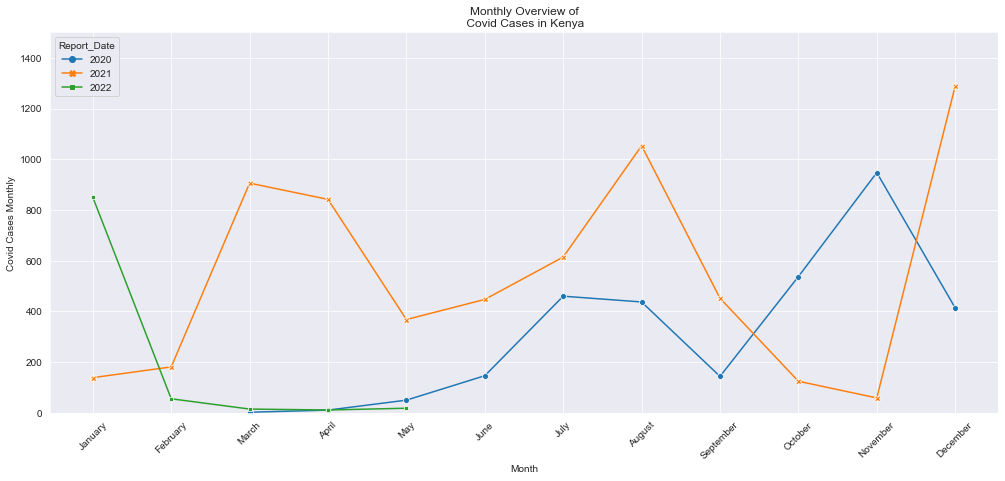

In [242]:
# PLot in a graph
ix = list(range(0, len(df_covid_monthly.columns), 10))

with sns.axes_style("darkgrid"):
    for i in ix:
        plt.figure(figsize=(17, 7))
        data = df_covid_monthly.iloc[:, i:i+10]
        sns.lineplot(data=data, markers=True, dashes=False)
        
        plt.xticks(np.arange(1, 13), calendar.month_name[1:13], rotation=45)
        plt.ylim(0,1500)
        plt.xlabel('Month')
        plt.ylabel('Covid Cases Monthly')
        plt.title(f"Monthly Overview of\n Covid Cases in Kenya")
        plt.show()

In [245]:
# Get the latest Total recorded Confirmed cases
df_covid_confirmed = covid_df_merged["confirmed"][covid_df_merged.index[-1]]
df_covid_confirmed

324129

In [246]:
# Get the latest Total recorded Death cases
df_covid_deaths = covid_df_merged["deaths"][covid_df_merged.index[-1]]
df_covid_deaths

5649

In [247]:
# Get the latest Total Recovered cases
df_covid_recovered = covid_df_merged['new_recovered'].sum()
df_covid_recovered

318224

## Build a Web app round this data using streamlit and host on heroku

# THE END